In [1]:
# Import dependencies
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
# Load the data and create a DataFrame for the data
short_filtered_cleaned_byarea_df = pd.read_csv('short_filtered_cleaned_byarea.csv')
short_filtered_cleaned_byarea_df.head()

,AREA,EVENT_TYPE,RACE,SEX,SITE,YEAR,AGE_ADJUSTED_RATE
0,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0
1,Alabama,Mortality,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0
2,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0
3,Alabama,Mortality,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0
4,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,2001,0.0


In [3]:
# Check shape of DataFrame
short_filtered_cleaned_byarea_df.shape

(653591, 7)

In [4]:
# Check for info DataFrame
short_filtered_cleaned_byarea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653591 entries, 0 to 653590
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AREA               653591 non-null  object 
 1   EVENT_TYPE         653591 non-null  object 
 2   RACE               653591 non-null  object 
 3   SEX                653591 non-null  object 
 4   SITE               653591 non-null  object 
 5   YEAR               653591 non-null  int64  
 6   AGE_ADJUSTED_RATE  653591 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 34.9+ MB


In [5]:
# Convert YEAR to category
short_filtered_cleaned_byarea_df['YEAR'] = short_filtered_cleaned_byarea_df['YEAR'].astype('object')

In [6]:
# Check Datatypes of DataFrame
short_filtered_cleaned_byarea_df.dtypes

AREA                  object
EVENT_TYPE            object
RACE                  object
SEX                   object
SITE                  object
YEAR                  object
AGE_ADJUSTED_RATE    float64
dtype: object

In [7]:
# Generate our categorical variable list
short_filtered_cleaned_byarea_df_cat = short_filtered_cleaned_byarea_df.dtypes[
    short_filtered_cleaned_byarea_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
short_filtered_cleaned_byarea_df[short_filtered_cleaned_byarea_df_cat].nunique()

AREA          51
EVENT_TYPE     2
RACE           5
SEX            3
SITE          26
YEAR          21
dtype: int64

In [8]:
# Check unique values of categories in DataFrame
print(short_filtered_cleaned_byarea_df['AREA'].unique())
print(short_filtered_cleaned_byarea_df['EVENT_TYPE'].unique())
print(short_filtered_cleaned_byarea_df['RACE'].unique())
print(short_filtered_cleaned_byarea_df['SEX'].unique())
print(short_filtered_cleaned_byarea_df['SITE'].unique())
print(short_filtered_cleaned_byarea_df['YEAR'].unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
['Incidence' 'Mortality']
['American Indian/Alaska Native' 'Asian/Pacific Islander' 'Black'
 'Hispanic' 'White']
['Female' 'Male' 'Male and Female']
['Brain and Other Nervous System' 'Cervix' 'Colon and Rectum'
 'Corpus and Uterus, NOS' 'Esophagus' 'Female Breast'
 'Female Breast, <i>in situ</i>' 'Hodgkin Lymphoma' 'Kaposi Sarcoma'
 'Kidney and Renal Pelvis' 'Larynx' 'Leukemias'
 'Liver and I

In [9]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(short_filtered_cleaned_byarea_df)
X.head()

,AGE_ADJUSTED_RATE,AREA_Alabama,AREA_Alaska,AREA_Arizona,AREA_Arkansas,AREA_California,AREA_Colorado,AREA_Connecticut,AREA_Delaware,AREA_District of Columbia,...,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,YEAR_2017,YEAR_2018,YEAR_2019
0,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Standardize the data with StandardScaler().
X_scaled =  StandardScaler().fit_transform(X)
# print(X_scaled[0:5])

In [11]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [12]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(
    data = X_pca,
    columns = ['PC 1', 'PC 2', 'PC 3'], index = short_filtered_cleaned_byarea_df.index
)
pcs_df.head()

,PC 1,PC 2,PC 3
0,0.943336,-0.769249,-2.243531
1,-1.647334,-0.373099,-2.050493
2,0.949075,-0.707527,-2.234027
3,-1.641596,-0.311378,-2.040988
4,0.962704,-0.684511,-2.393534


In [13]:
# fetch the explaiend variace
pca.explained_variance_ratio_

array([0.02026371, 0.01499414, 0.014733  ])

In [14]:
# Create an elbow curve to find the best value for K.
# Find the best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)


In [15]:
# Create the elbow curve DataFrame
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

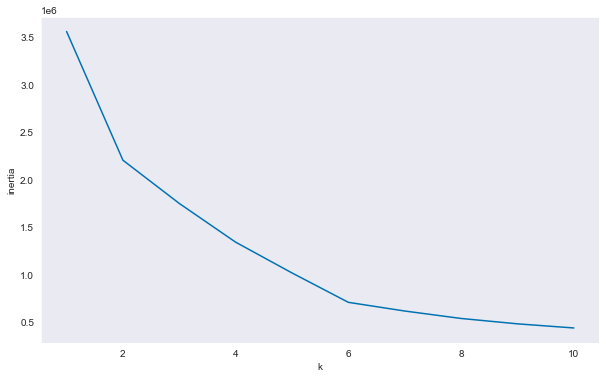

In [16]:
# plot elbow curve

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(10,6))

sns.lineplot(x = df_elbow['k'], 
            y = df_elbow['inertia']
           )

plt.show()

In [17]:
# Initialize the K-Means model.
model = KMeans(n_clusters = 6, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
print(predictions)

[3 4 3 ... 2 5 2]


In [18]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([short_filtered_cleaned_byarea_df, pcs_df], axis = 1)


#  Add a new column, "CLASS" to the clustered_df DataFrame that holds the predictions.
clustered_df['CLASS'] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head()

(653591, 11)


,AREA,EVENT_TYPE,RACE,SEX,SITE,YEAR,AGE_ADJUSTED_RATE,PC 1,PC 2,PC 3,CLASS
0,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0,0.943336,-0.769249,-2.243531,3
1,Alabama,Mortality,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0,-1.647334,-0.373099,-2.050493,4
2,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0,0.949075,-0.707527,-2.234027,3
3,Alabama,Mortality,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0,-1.641596,-0.311378,-2.040988,4
4,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,2001,0.0,0.962704,-0.684511,-2.393534,3


In [19]:
clustered_df2 = clustered_df.copy()

In [20]:
clustered_df2.drop(columns = ['PC 1', 'PC 2', 'PC 3'], inplace = True)
clustered_df2.head()

,AREA,EVENT_TYPE,RACE,SEX,SITE,YEAR,AGE_ADJUSTED_RATE,CLASS
0,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0,3
1,Alabama,Mortality,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0,4
2,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0,3
3,Alabama,Mortality,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0,4
4,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,2001,0.0,3


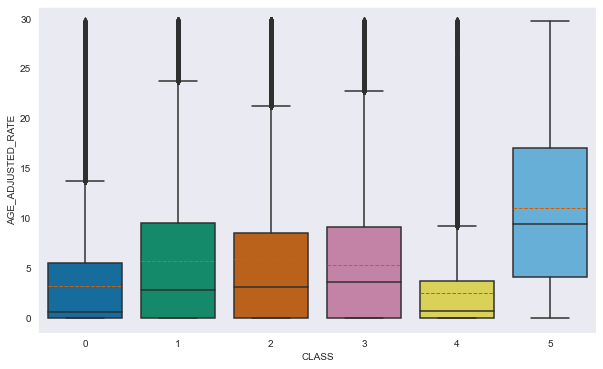

In [24]:
# plot box plot of age-adjusted rate for CLASS

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(10,6))

sns.boxplot(x = clustered_df2['CLASS'], 
            y = clustered_df2['AGE_ADJUSTED_RATE'],
           showmeans = True,
            #showfliers = False,
           meanline = True
           )

plt.show()

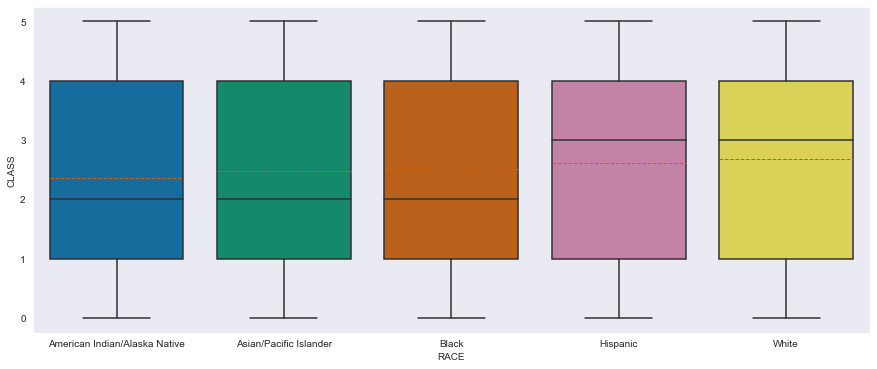

In [29]:
# plot box plot of RACE vs CLASS

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(15,6))

sns.boxplot(x = clustered_df2['RACE'], 
            y = clustered_df2['CLASS'],
           showmeans = True,
            #showfliers = False,
           meanline = True
           )

plt.show()

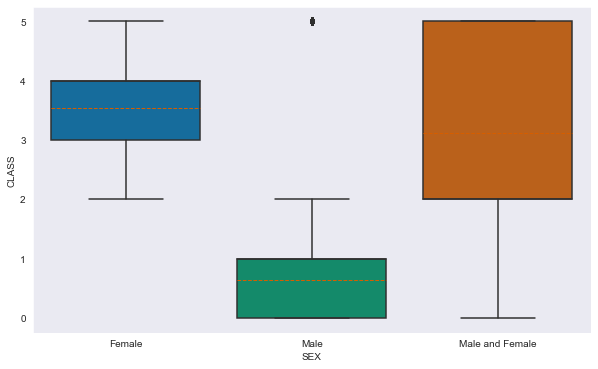

In [34]:
# plot box plot of SEX vs CLASS

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(10,6))

sns.boxplot(x = clustered_df2['SEX'],
            y = clustered_df2['CLASS'],
           showmeans = True,
            #showfliers = False,
           meanline = True
           )

plt.show()

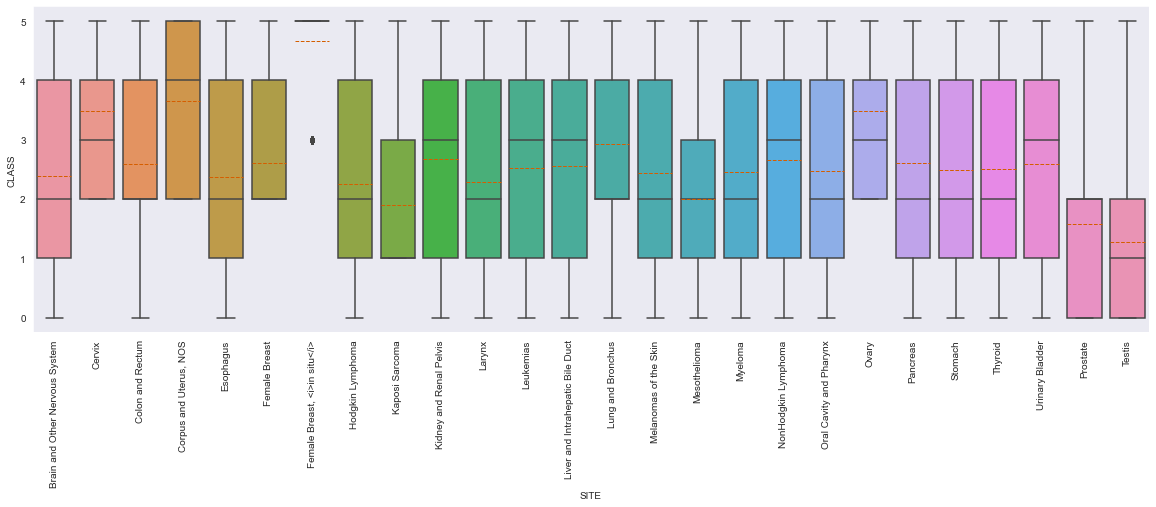

In [36]:
# plot box plot of SITE vs CLASS

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(20,6))

sns.boxplot(x = clustered_df2['SITE'], 
            y = clustered_df2['CLASS'],
           showmeans = True,
            #showfliers = False,
           meanline = True
           )

plt.xticks(rotation = 90)

plt.show()

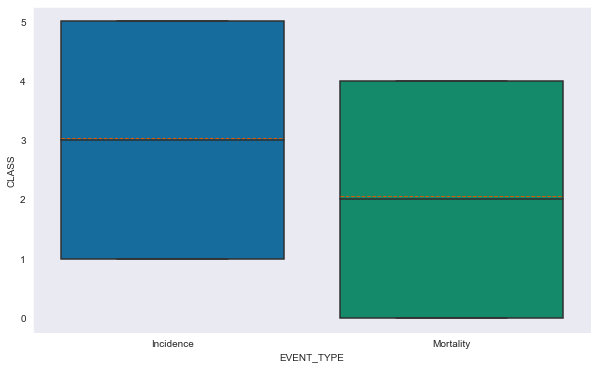

In [37]:
# plot box plot of EVENT_TYPE vs CLASS

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(20,6))

sns.boxplot(x = clustered_df2['SITE'], 
            y = clustered_df2['CLASS'],
           showmeans = True,
            #showfliers = False,
           meanline = True
           )

plt.xticks(rotation = 90)

plt.show()

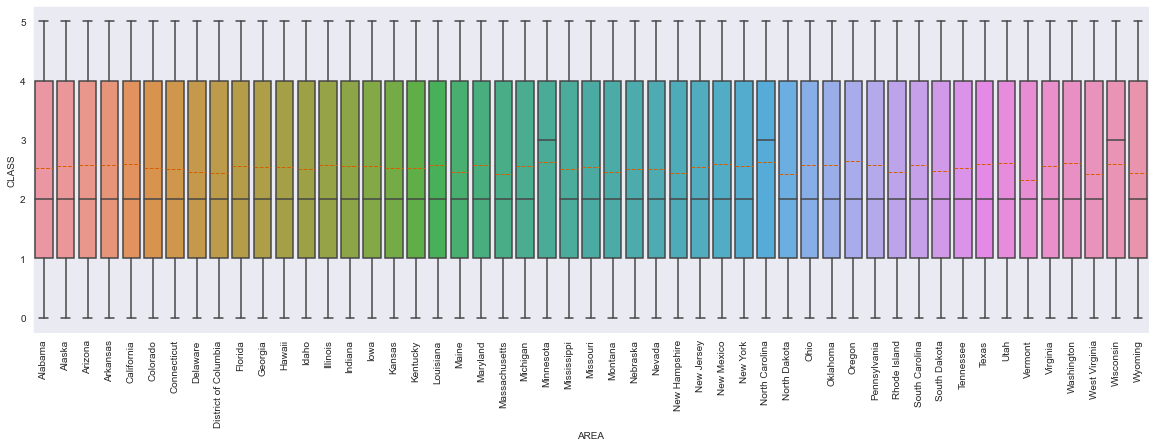

In [38]:
# plot box plot of AREA vs CLASS

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(20,6))

sns.boxplot(x = clustered_df2['AREA'], 
            y = clustered_df2['CLASS'],
           showmeans = True,
            #showfliers = False,
           meanline = True
           )

plt.xticks(rotation = 90)

plt.show()

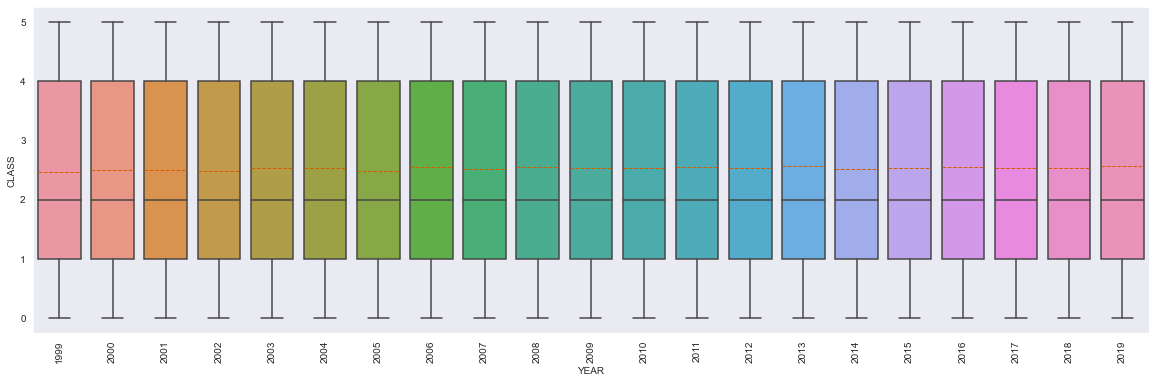

In [39]:
# plot box plot of YEAR vs CLASS

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(20,6))

sns.boxplot(x = clustered_df2['YEAR'], 
            y = clustered_df2['CLASS'],
           showmeans = True,
            #showfliers = False,
           meanline = True
           )

plt.xticks(rotation = 90)

plt.show()

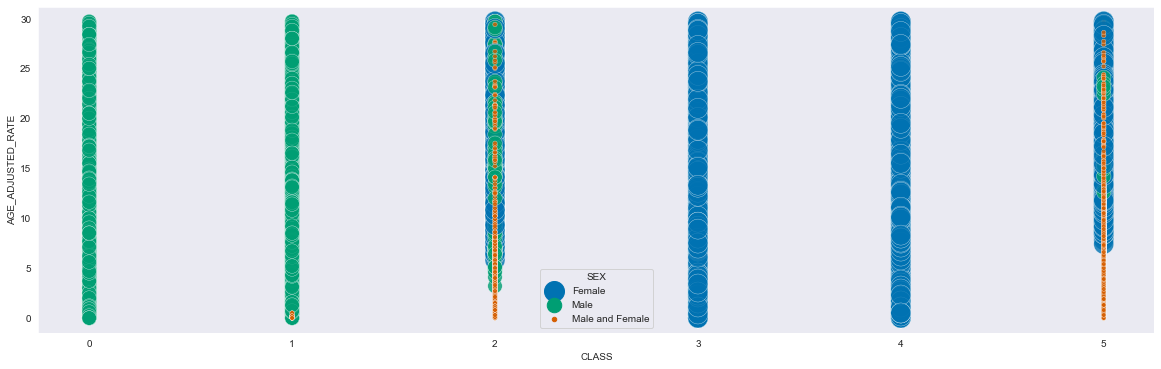

In [58]:
# plot scatter plot of SEX vs CLASS

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(20,6))

sns.scatterplot(data = clustered_df2, 
                x='CLASS', y = 'AGE_ADJUSTED_RATE', size = 'SEX', hue = 'SEX', alpha=0.8, sizes=(20, 400))

plt.show()

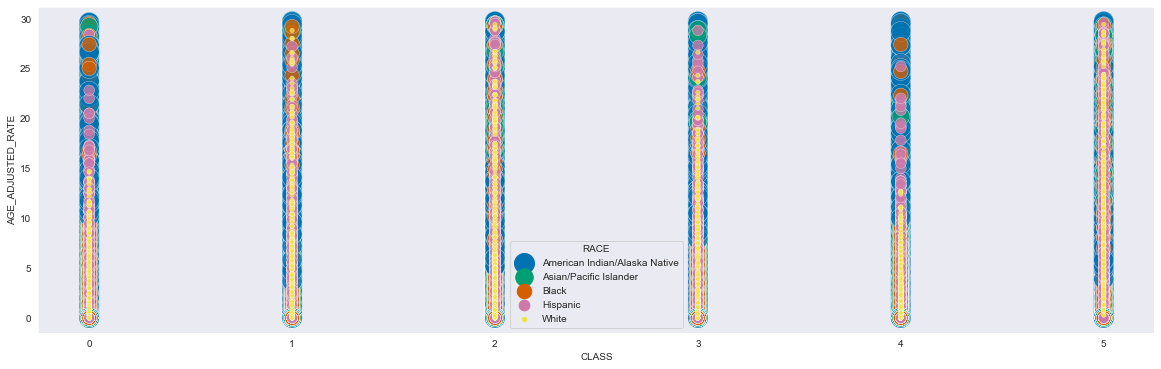

In [49]:
# plot scatter plot of RACE vs CLASS

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(20,6))

sns.scatterplot(data = clustered_df2, 
                x='CLASS', y = 'AGE_ADJUSTED_RATE', size = 'RACE' , hue = 'RACE', alpha=0.8, sizes=(20, 400))

plt.show()

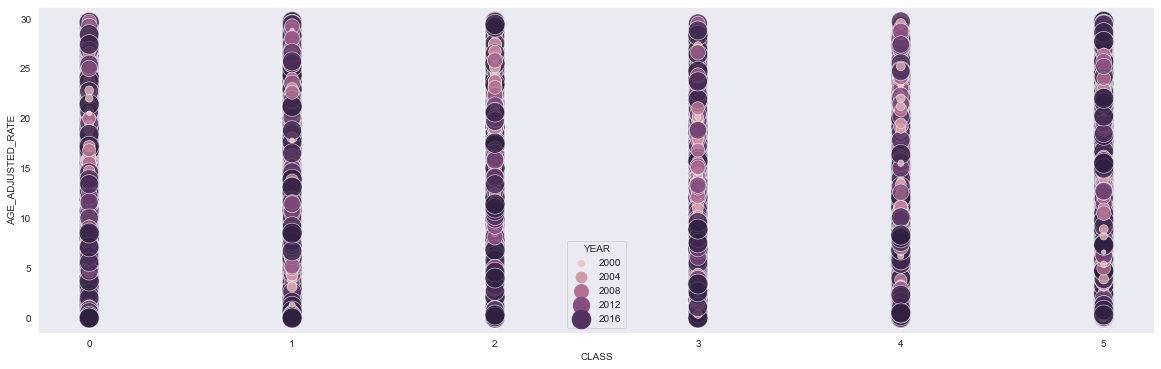

In [50]:
# plot scatter plot of YEAR vs CLASS

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(20,6))

sns.scatterplot(data = clustered_df2, 
                x='CLASS', y = 'AGE_ADJUSTED_RATE', size = 'YEAR' , hue = 'YEAR', alpha=0.8, sizes=(20, 400))

plt.show()